In [1]:
import re, glob

In [2]:
import pandas

In [3]:
import pystain

In [4]:
subject_ids = [13095, 14037, 14051, 14069, 15033, 15035, 15055]

In [5]:
from matplotlib.backends.backend_pdf import PdfPages

In [9]:
import skimage
from skimage import io
import nibabel as nb

In [8]:
results = []

for subject_id in subject_ids:
    print subject_id
    
    year = '20' + str(subject_id)[:2]
    n = str(subject_id)[2:]
    
    im = skimage.io.imread('/home/public/HISTO_TO_MRI_1/Blockface_stacks/{subject_id}/{subject_id}.tif'.format(**locals()))
    mri_slices = pandas.read_csv('/home/public/HISTO_TO_MRI_1/Blockface_stacks/True_slice_distance/{n}_{year}_3removed.txt'.format(**locals()), header=None, names=['slice'])
    
    ds = pystain.StainDataset(subject_id)
    
    if subject_id == None:
        r = {'subject_id':subject_id, 'bf_tif_x':im.shape[1], 'bf_tif_y':im.shape[0], 'bf_tif_slices':im.shape[2],
             'staining_x':ds.data.shape[2], 'staining_y':ds.data.shape[1], 'staining_slices':ds.data.shape[0],             
         'n_slices_txt_file':mri_slices.shape[0]}
    else:
        
    
        mri = nb.load('/home/public/HISTO_TO_MRI_1/MRI_DATA/MRI/Control/FLASH/{subject_id}/{subject_id}_control_flash_006_ts.nii'.format(**locals())).get_data()

        r = {'subject_id':subject_id, 'bf_tif_x':im.shape[2], 'bf_tif_y':im.shape[1], 'bf_tif_slices':im.shape[0],
             'mri_x':mri.shape[0], 'mri_y':mri.shape[1], 'mri_n_slices':mri.shape[2],
             'staining_x':ds.data.shape[2], 'staining_y':ds.data.shape[1], 'staining_slices':ds.data.shape[0],
             'n_slices_txt_file':mri_slices.shape[0]}
    
    results.append(r)

13095
/home/gdholla1/data/post_mortem/new_data_format/13095/images.hdf5
14037
/home/gdholla1/data/post_mortem/new_data_format/14037/images.hdf5
14051
/home/gdholla1/data/post_mortem/new_data_format/14051/images.hdf5
14069
/home/gdholla1/data/post_mortem/new_data_format/14069/images.hdf5
15033
/home/gdholla1/data/post_mortem/new_data_format/15033/images.hdf5
15035
/home/gdholla1/data/post_mortem/new_data_format/15035/images.hdf5
15055
/home/gdholla1/data/post_mortem/new_data_format/15055/images.hdf5


In [9]:
pandas.DataFrame(results).set_index('subject_id')

,bf_tif_slices,bf_tif_x,bf_tif_y,mri_n_slices,mri_x,mri_y,n_slices_txt_file,staining_slices,staining_x,staining_y
subject_id,,,,,,,,,,
13095,51,1896,1512,48,1896,1512,48,25,1512,1896
14037,56,1704,1360,53,1360,1704,53,29,1360,1704
14051,52,1500,1500,52,1500,1500,52,26,1500,1500
14069,46,1674,1320,46,1674,1320,46,31,1674,1320
15033,40,1944,2292,40,1944,2292,40,27,1944,2292
15035,59,2300,2300,59,2300,2300,59,29,2300,2300
15055,48,1860,1617,45,1860,1617,45,32,1617,1860


In [7]:
from scipy import ndimage
import nibabel as nb

In [11]:
for modality in ['T1', 'T2star'][1:]:

    for subject_id in subject_ids[-2:-1]:

        print modality, subject_id


        pdf = PdfPages('/home/gdholla1/projects/post_mortem/reports/check_mri_hist_alignment/{modality}_stain_reg_{subject_id}_v2.pdf'.format(**locals()))

        year = '20' + str(subject_id)[:2]
        n = str(subject_id)[2:]

        mri_slices = pandas.read_csv('/home/public/HISTO_TO_MRI_1/Blockface_stacks/True_slice_distance/{n}_{year}_3removed.txt'.format(**locals()), header=None, names=['slice'])
        mri_slices['slice'] = mri_slices.slice.apply(lambda e: e / 50 * 50)
        mri_slices = mri_slices.set_index('slice')
        mri_slices['n'] = np.arange(mri_slices.shape[0])

        ds = pystain.StainDataset(subject_id)


        if modality == 'T1':
#             mri = nb.load('/home/public/HISTO_TO_MRI_1/MRI_DATA/MRI/Control/FLASH/{subject_id}/{subject_id}_control_flash_006_ts.nii'.format(**locals())).get_data()
            mri = nb.load('/home/public/HISTO_TO_MRI_1/MRI_DATA/MRI/Control/T1_map/{subject_id}/{subject_id}_t1map_2_FLASH_006_ts.nii.gz'.format(**locals())).get_data()

        elif modality == 'T2star':
            mri = nb.load('/home/public/HISTO_TO_MRI_1/MRI_DATA/MRI/Control/T2s_map/{subject_id}/{subject_id}_t2map_2_FLASH_006_ts.nii.gz'.format(**locals())).get_data()

        mri = np.swapaxes(mri, 0, 1)
        im = skimage.io.imread('/home/public/HISTO_TO_MRI_1/Blockface_stacks/{subject_id}/{subject_id}.tif'.format(**locals()))
        
        if mri.shape[2] != im.shape[0]:
            im = im[3:, ...]
            
        assert(mri.shape[2] == im.shape[0])

        if subject_id in [13095]:
            mri = np.rot90(mri, 3)
            im = np.rot90(im, 3, axes=(1, 2))

        if subject_id in [14037]:
    #         im = np.rot90(im, 3, axes=(1, 2))
            im = np.swapaxes(im, 1, 2)
            im = im[:, ::-1, :, :]

        if subject_id in [15055]:
            mri = np.rot90(mri)
            im = np.rot90(im, axes=(1, 2))        



        try:
            assert(mri.shape[-1] == mri_slices.shape[0])

            print 'MRI Shape: %s' % list(mri.shape)
            print 'Stain shape: %s:' %  list(ds.data.shape)


            mri_in_stain_space = np.zeros((len(ds.slices), ds.data.shape[1], ds.data.shape[2]))
            blockface_image = np.zeros((len(ds.slices), ds.data.shape[1], ds.data.shape[2], 3))

            for slice in ds.slices[:]:
                print slice

                if slice in mri_slices.index:

                    mri_slice_idx = mri_slices.ix[slice].n
                    stain_slice_idx = ds._get_index_slice(slice)

                    plt.subplot(141)
                    plt.imshow(sp.ndimage.gaussian_filter(ds.data[stain_slice_idx, ..., ds._get_index_stain('SMI32')], 7.5), cmap=plt.cm.inferno)
                    plt.contour(ds.thresholded_mask[stain_slice_idx, ...] == False, levels=[.5], colors=['white'])

                    plt.xticks(np.arange(0, plt.xticks()[0][-1], 250))
                    plt.yticks(np.arange(0, plt.yticks()[0][-1], 250))
                    plt.title('SMI32')

                    plt.subplot(142)
                    plt.imshow(sp.ndimage.gaussian_filter(ds.data[stain_slice_idx, ..., ds._get_index_stain('PARV')], 7.5), cmap=plt.cm.inferno)
                    plt.contour(ds.thresholded_mask[stain_slice_idx, ...] == False, levels=[.5], colors=['white'])

                    plt.xticks(np.arange(0, plt.xticks()[0][-1], 250))
                    plt.yticks(np.arange(0, plt.yticks()[0][-1], 250))    
                    plt.title('PARV')    

                    plt.subplot(143)
                    
                    if modality == 'T2star':
                        plt.imshow(mri[:, :, mri_slice_idx], cmap=plt.cm.inferno, vmin=0, vmax=65)
                    else:
                        plt.imshow(mri[:, :, mri_slice_idx], cmap=plt.cm.inferno)
                    # plt.axis('off')
                    plt.contour(ds.thresholded_mask[stain_slice_idx, ...] == False, levels=[.5], colors=['white'])
                    plt.xticks(np.arange(0, plt.xticks()[0][-1], 250))
                    plt.yticks(np.arange(0, plt.yticks()[0][-1], 250))
                    plt.title(modality)    


                    plt.subplot(144)
                    plt.imshow(im[mri_slice_idx, ...])
                    # plt.axis('off')
                    plt.contour(ds.thresholded_mask[stain_slice_idx, ...] == False, levels=[.5], colors=['white'])
                    plt.xticks(np.arange(0, plt.xticks()[0][-1], 250))
                    plt.yticks(np.arange(0, plt.yticks()[0][-1], 250))
                    plt.title('Blockface image')                

                    plt.gcf().set_size_inches(40, 20)
                    plt.suptitle('Slice %d' % slice)
                    plt.savefig(pdf, format='pdf')
                    plt.close(plt.gcf())

                    mri_in_stain_space[stain_slice_idx, ...] = mri[:, :, mri_slice_idx]
                    blockface_image[stain_slice_idx, ...] = im[mri_slice_idx, ...]

            if '{modality}_in_stain_space'.format(**locals()) in ds.h5file.keys():
                del ds.h5file['{modality}_in_stain_space'.format(**locals())]

            ds.h5file['{modality}_in_stain_space'.format(**locals())] = mri_in_stain_space
#             ds.h5file['blockface_image'] = blockface_image
            ds.h5file.flush()


        except Exception as e:
            print e

        pdf.close()

T2star 15035
/home/gdholla1/data/post_mortem/new_data_format/15035/images.hdf5
MRI Shape: [2300, 2300, 59]
Stain shape: [29, 2300, 2300, 12]:
700


/usr/local/lib/python2.7/dist-packages/matplotlib/colors.py:821: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/local/lib/python2.7/dist-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100


In [60]:
sns.set_context('poster')

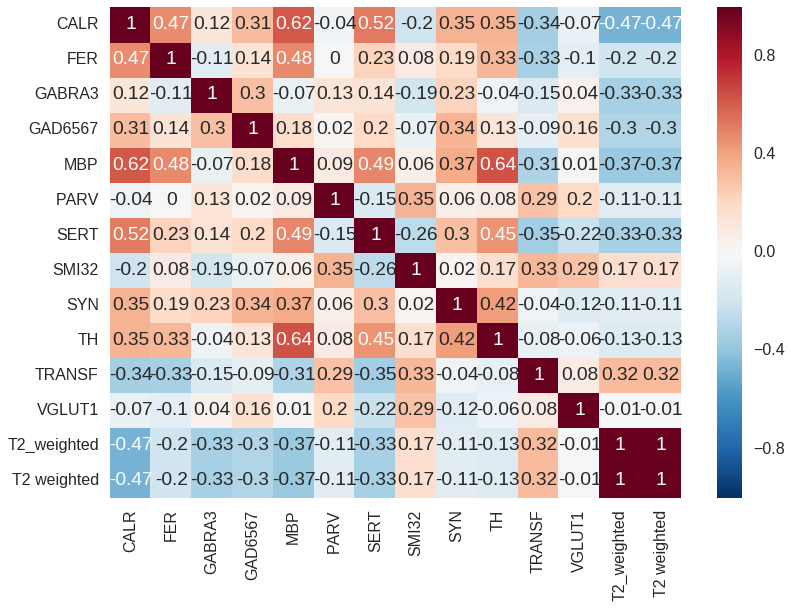

In [61]:
sns.heatmap(np.round(ds.smoothed_dataframe.corr(), 2), annot=True)

In [ ]:
plt.plot(ds.mask.value.sum(-1).max(-1).max(-1))

In [21]:
ds.mask_pandas.groupby('rater').size()

rater
KH    61
dtype: int64

In [50]:

np.rot90(im, 3, axes=(1, 2))

TypeError: rot90() got an unexpected keyword argument 'axes'

In [51]:
np.__version__

'1.11.3'